In [26]:
import seaborn as sns
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [32]:
%reload_ext tensorboard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras.models import load_model

import imutils
import matplotlib

# matplotlib.use("Agg")

from tensorflow import keras 
from keras.callbacks import CSVLogger
# from keras.optimizers import Adam
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from imutils import paths
import numpy as np
import random
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime

dataset_url ='G:/MSC_CSjpura/2nd_Semester/ML/Ass2/task2/data/dataset/' 
batch = 10
num_classes =3

training_dataset = datagen.flow_from_directory(dataset_url,
                                              color_mode=='rgb',
                                              target_size=(227,227),
                                              shuffle=True,
                                              class_mode="categorical",
                                              subset='training',
                                              batch_size=batch,
                                              save_to_dir=None)


validation_dataset = datagen.flow_from_directory(dataset_url,
                                              color_mode=="rgb",
                                              target_size=(227,227),
                                              shuffle=True,
                                              class_mode="categorical",
                                              subset='validation',
                                              batch_size=batch,
                                              save_to_dir=None)

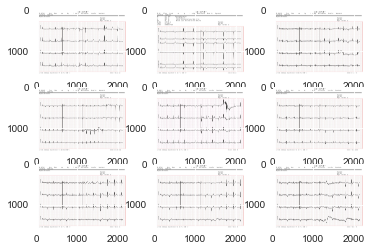

In [65]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread

batch = 10
num_classes =3

# define location of dataset
folder = 'G:/MSC_CSjpura/2nd_Semester/ML/Ass2/task2/data/dataset/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'COVID-.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

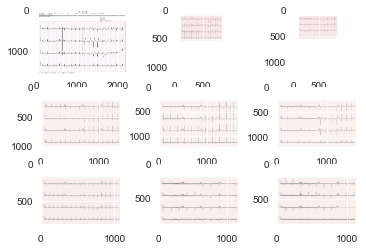

In [66]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'G:/MSC_CSjpura/2nd_Semester/ML/Ass2/task2/data/dataset/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'COVID+.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
# from os import listdir

# from numpy import asarray
# from numpy import save
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# # define location of dataset
# folder = 'G:/MSC_CSjpura/2nd_Semester/ML/Ass2/task2/data/dataset/'
# photos, labels = list(), list()
# # enumerate files in the directory
# for file in listdir(folder):
#     # determine class
#     output = 0.0
#     if file.startswith('COVID-'):
#         output = 1.0
#     # load image
#     photo = load_img(folder + file, target_size=(200, 200))
#     # convert to numpy array
#     photo = img_to_array(photo)
#     # store
#     photos.append(photo)
#     labels.append(output)
# # convert to a numpy arrays
# photos = asarray(photos)
# labels = asarray(labels)
# print(photos.shape, labels.shape)
# # save the reshaped photos
# save('Cp_vs_Cn_photos.npy', photos)
# save('Cp_vs_Cn_labels.npy', labels)

In [ ]:
# # load and confirm the shape
# from numpy import load
# photos = load('Cp_vs_Cn_photos.npy')
# labels = load('Cp_vs_Cn_labels.npy')
# print(photos.shape, labels.shape)

In [ ]:
# from os import makedirs
# # create directories
# dataset_home = 'dataset_Cp_vs_Cn/'
# subdirs = ['train/', 'test/']
# for subdir in subdirs:
#     # create label subdirectories
#     labeldirs = ['COVID+/', 'COVID-/']
#     for labldir in labeldirs:
#         newdir = dataset_home + subdir + labldir
#         makedirs(newdir, exist_ok=True)

In [ ]:
# from random import seed
# from random import random
# from shutil import copyfile
# # seed random number generator
# seed(1)
# # define ratio of pictures to use for validation
# val_ratio = 0.25
# # copy training dataset images into subdirectories
# src_directory = 'G:/MSC_CSjpura/2nd_Semester/ML/Ass2/task2/data/dataset/'
# for file in listdir(src_directory):
#     src = src_directory + '/' + file
#     dst_dir = 'train/'
#     if random() < val_ratio:
#         dst_dir = 'test/'
#     if file.startswith('COVID-'):
#         dst = dataset_home + dst_dir + 'COVID-/'  + file
#         copyfile(src, dst)
#     elif file.startswith('COVID+'):
#         dst = dataset_home + dst_dir + 'COVID+/'  + file
#         copyfile(src, dst)

In [2]:
labels = ['COVID+', 'COVID-']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
#Now we can easily fetch our train and validation data.
train = get_data('G:/MSC_CSjpura/2nd_Semester/ML/Ass2/task2/data/preprocessed/train')

val = get_data('G:/MSC_CSjpura/2nd_Semester/ML/Ass2/task2/data/preprocessed/test')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

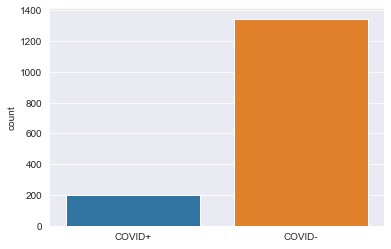

In [4]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("COVID+")
    else:
        l.append("COVID-")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'COVID+')

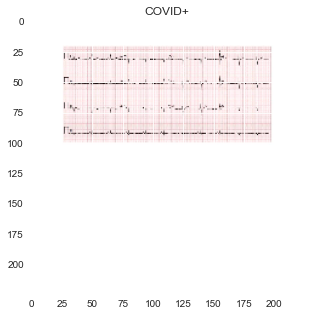

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'COVID-')

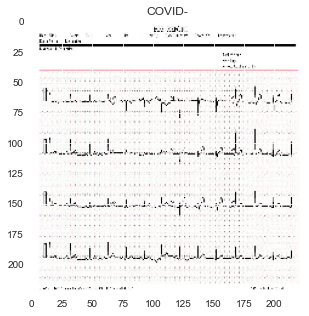

In [8]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [9]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [10]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [11]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [12]:
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

C:\Users\User\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
history = model.fit(x_train,y_train,epochs = 50 , validation_data = (x_val, y_val))

Epoch 1/50


C:\Users\User\Anaconda3\lib\site-packages\keras\backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


49/49 [==============================] - 441s 4s/step - loss: 0.4613 - accuracy: 0.8629 - val_loss: 0.3687 - val_accuracy: 0.8705
Epoch 2/50
49/49 [==============================] - 134s 3s/step - loss: 0.3605 - accuracy: 0.8706 - val_loss: 0.3566 - val_accuracy: 0.8705
Epoch 3/50
49/49 [==============================] - 140s 3s/step - loss: 0.3521 - accuracy: 0.8706 - val_loss: 0.3549 - val_accuracy: 0.8705
Epoch 4/50
49/49 [==============================] - 136s 3s/step - loss: 0.3517 - accuracy: 0.8706 - val_loss: 0.3522 - val_accuracy: 0.8705
Epoch 5/50
49/49 [==============================] - 132s 3s/step - loss: 0.3454 - accuracy: 0.8706 - val_loss: 0.3492 - val_accuracy: 0.8705
Epoch 6/50
49/49 [==============================] - 132s 3s/step - loss: 0.3386 - accuracy: 0.8706 - val_loss: 0.3452 - val_accuracy: 0.8705
Epoch 7/50
49/49 [==============================] - 130s 3s/step - loss: 0.3340 - accuracy: 0.8706 - val_loss: 0.3416 - val_accuracy: 0.8705
Epoch 8/50
49/49 [======

In [39]:
model.save('final_model.h5')

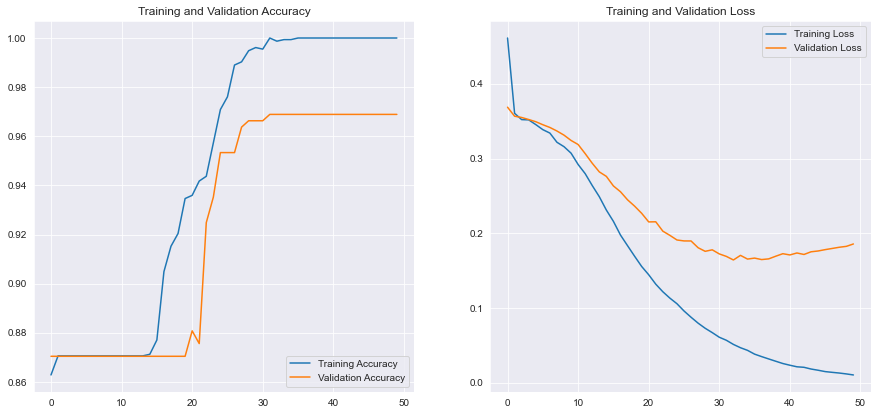

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
x_train.shape

(1546, 224, 224, 3)

In [24]:
y_train.shape

(1546,)

In [21]:
x_val.shape

(386, 224, 224, 3)

In [62]:
y_val.shape

(386,)

In [57]:
predictions = model.predict(x_val)
predictions = predictions.reshape(1,-1)[0]
predictions

array([6.47553802e-03, 9.93524432e-01, 1.27106486e-03, 9.98728931e-01,
       2.59177061e-03, 9.97408211e-01, 9.52308536e-01, 4.76914570e-02,
       9.58438873e-01, 4.15611491e-02, 9.04947877e-01, 9.50521380e-02,
       9.02475953e-01, 9.75240692e-02, 9.30233657e-01, 6.97663575e-02,
       9.53208566e-01, 4.67914082e-02, 9.02162790e-01, 9.78372619e-02,
       9.43597078e-01, 5.64029813e-02, 9.25899923e-01, 7.41000399e-02,
       9.53517973e-01, 4.64819893e-02, 9.65531707e-01, 3.44683267e-02,
       9.54578519e-01, 4.54214178e-02, 9.55500245e-01, 4.44997922e-02,
       9.67823386e-01, 3.21766958e-02, 8.82991016e-01, 1.17008962e-01,
       9.18883204e-01, 8.11167583e-02, 9.52649891e-01, 4.73501496e-02,
       9.28453207e-01, 7.15468451e-02, 9.27977562e-01, 7.20224977e-02,
       9.63875890e-01, 3.61241028e-02, 9.67154860e-01, 3.28451321e-02,
       9.46316242e-01, 5.36837317e-02, 9.38917577e-01, 6.10823706e-02,
       8.98181856e-01, 1.01818182e-01, 9.52706456e-01, 4.72935699e-02,
      

In [58]:
print(classification_report(y_val, predictions, target_names = ['COVID- (Class 0)','COVID+ (Class 1)']))

ValueError: Found input variables with inconsistent numbers of samples: [386, 772]

In [61]:
# evaluate the model
    labels_test_cat = to_categorical(labels[y_val], num_classes=sinif)
    # csv_logger_testing = CSVLogger(trainingCSV_kfold_test, append=True)
    scores = model.evaluate(data[test], labels_test_cat, verbose=0) #, callbacks=[csv_logger_testing]

    

TypeError: only integer scalar arrays can be converted to a scalar index

In [43]:
# load and prepare the image
def load_image(sample):
    # load the image
    img = load_img(sample, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

In [44]:
# predict the class
result = model.predict(img)

NameError: name 'img' is not defined

In [3]:
# %load_ext tensorboard
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import layers
# from tensorflow.keras.callbacks import TensorBoard
# from tensorflow import keras
# from tensorflow.keras.models import load_model

# import imutils
# import matplotlib

# # matplotlib.use("Agg")

# from tensorflow import keras 
# from keras.callbacks import CSVLogger
# from keras.optimizers import Adam
# from matplotlib import pyplot
# from sklearn.model_selection import train_test_split
# from keras.preprocessing.image import img_to_array
# from keras.utils import to_categorical
# from imutils import paths
# import numpy as np
# import random
# import cv2
# import os
# import matplotlib.pyplot as plt
# from sklearn.model_selection import StratifiedKFold

# import tensorflow as tf
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# import datetime

# dataset_url = "G:/MSC CS jpura/2nd Semester/ML/Ass2/task2/data"
# batch = 10
# num_classes =3

# #generate data with augmentation
# datagen = ImageDataGenerator(width_shift_range =0.1, height_shift_range =0.1,
#                             rotation_range=10, shear_range=0.1,zoom_range=0.1,
#                             horizontal_flip=True, vertical_flip=False,
#                             validation_split = 0.2, rescale = 1/255)

# training_dataset = datagen.flow_from_directory(dataset_url,
#                                               color_mode=='rgb',
#                                               target_size=(227,227),
#                                               shuffle=True,
#                                               class_mode="categorical",
#                                               subset='training',
#                                               batch_size=batch,
#                                               save_to_dir=None)


# validation_dataset = datagen.flow_from_directory(dataset_url,
#                                               color_mode=="rgb",
#                                               target_size=(227,227),
#                                               shuffle=True,
#                                               class_mode="categorical",
#                                               subset='validation',
#                                               batch_size=batch,
#                                               save_to_dir=None)

# #AlexNet

# input = layers.Input(shape=(227,227,3))
# x = layers.Conv2D(96,(11,11), activation = "relu", padding="valid", strides=4)(input)
# x = layers.Maxpooling2D((3,3),strides=(2,2),padding="valid")(x)
# x = layers.Conv2D(256,(5,5), activation = "relu", padding="same", strides=1)(x)
# x = layers.Maxpooling2D((3,3),strides=(2,2),padding="valid")(x)
# x = layers.Conv2D(384,(3,3), activation = "relu", padding="same", strides=1)(x)
# x = layers.Conv2D(256,(3,3), activation = "relu", padding="same", strides=1)(x)
# x = layers.Maxpooling2D((3,3),strides=(2,2),padding="valid")(x)
# x =  layers.Flatten()(x)


# #dense layer

# x= layers.Dense(units=4096, activation="relu")(x)
# x= layers.Dense(units=4096, activation="relu")(x)
# net= layers.Dense(units=num_classes, activation="softmax")(x)


# model= keras.Model(input,net)
# model_name="alex_chk.h5"
# checkpoint_path = "G:\\MSC CS jpura\\2nd Semester\\ML\\dnn\\checkpoint"+model_name
# #checkpoint_dir = ps.path.dirname(checkpoint_path)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor ='loss', verbose=1, save_best_only =True, mode='auto',
#                                                 period = 5)

# opt= keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer = opt, loss="categorical_crossentropy", metric=['accuracy'])





#  # 1st Convolutional Layer
# model.add(Conv2D(filters=96, input_shape=inputShape, kernel_size=(11, 11), strides=(4, 4), padding='valid'))
# model.add(Activation('relu'))
# # Max Pooling
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# # 2nd Convolutional Layer
# model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(1, 1), padding='valid'))
# model.add(Activation('relu'))
# # Max Pooling
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# # 3rd Convolutional Layer
# model.add(Conv2D(filters=96, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
# model.add(Activation('relu'))

# # 4th Convolutional Layer
# model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
# model.add(Activation('relu'))

# model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
# model.add(Activation('relu'))

# # 5th Convolutional Layer
# model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
# model.add(Activation('relu'))
# # Max Pooling
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# # Passing it to a Fully Connected layer
# model.add(Flatten())
# # 1st Fully Connected Layer
# model.add(Dense(4096, input_shape=inputShape))
# model.add(Activation('relu'))
# # Add Dropout to prevent overfitting
# model.add(Dropout(0.4))

# # 2nd Fully Connected Layer
# model.add(Dense(4096))
# model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.4))

# # 3rd Fully Connected Layer
# model.add(Dense(1000))
# model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.4))

# # Output Layer
# model.add(Dense(classes))
# model.add(Activation('softmax'))

# # return the constructed network architecture
# return model


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


NameError: name 'color_mode' is not defined

In [23]:
# import pandas as pd
# import numpy as np

# # set the matplotlib backend so figures can be saved in the background
# import imutils
# import matplotlib

# # matplotlib.use("Agg")

# from tensorflow import keras 
# from keras.callbacks import CSVLogger
# from keras.optimizers import Adam
# from matplotlib import pyplot
# from sklearn.model_selection import train_test_split
# from keras.preprocessing.image import img_to_array, ImageDataGenerator
# from keras.utils import to_categorical
# from imutils import paths
# import numpy as np
# import random
# import cv2
# import os
# import matplotlib.pyplot as plt
# from sklearn.model_selection import StratifiedKFold
# # os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}


# # from myScripts.yardimci_fonks import cizim_islemleri  ################# I closed this .lib because i did not added my result drawing functions.
# from mimarilerim.alexnet_modified import networkArchFonc

ImportError: cannot import name 'get_config'

In [13]:
# title = 'Covid ECG features maps CN_kFold'
# hangi_calisma = "covid_ECG_training"  # KLASOR ISMI VERILECEK
# ag_modeli = "Modified-Alexnet" + " + Adam Optimizier"
# dataset = 'preprocessed_dataset'  ################YOU CAN EASLY CHANGE DATASET FILE WHAT YOU WANT TO TRAIN
# #etiket = ["Negative", "Positive"]
# label = ["NO-FINDINGS", "COVID-19"]
# sira = 34
# # initialize the number of epochs to train for, initial learning rate,
# EPOCHS = 50 ######## ALSO YOU CAN CHANGE THE HYPERPARAMETERS
# INIT_LR = 1e-3
# BS = 128  # datad adedinden küçük olmalı
# boyut = 256  # dataset image size
# class = 2  #
# depth = 3
# fboyut = 20
# cm_renkler = "Blues"
# fold_sayisi = 5

# ana_dizin = "../" #YOU CAN CHANGE

In [14]:
# # trainingCSV_kfold_test = ana_dizin + hangi_calisma + "/sonuclar/" + "kfold_testCSV.log"
# trainingCSV_kfold_train_and_validate = ana_dizin + hangi_calisma + "/sonuclar/" + "kfold_train_and_validateCSV.log"
# sira = str(sira) + "-" + title
# dataset = ana_dizin + hangi_calisma + "/" + dataset
# fig_boyut = (fboyut, fboyut)
# resim_boyut = (boyut, boyut)
# sonuc_kayit = ana_dizin + hangi_calisma + "/sonuclar/"
# model_save = ana_dizin + hangi_calisma + '/modeller/' + sira + "kFold" + "-M"
# acc_kayit = ana_dizin + hangi_calisma + "/sonuclar/" + sira + "kFold" + "-ACC"
# loss_kayit = ana_dizin + hangi_calisma + "/sonuclar/" + sira + "kFold" + "-LOSS"
# val_acc_kayit = ana_dizin + hangi_calisma + "/sonuclar/" + sira + "kFold" + "-VALACC"
# val_loss_kayit = ana_dizin + hangi_calisma + "/sonuclar/" + sira + "kFold" + "-VALLOSS"
# cm_kayit = ana_dizin + hangi_calisma + "/sonuclar/" + sira + "kFold" + "-CM"
# val_cm_kayit = ana_dizin + hangi_calisma + "/sonuclar/" + sira + "kFold" + "-CMVAL"
# val_PR_kayit = ana_dizin + hangi_calisma + "/sonuclar/" + sira + "kFold" + "-PRVAL"

# PR_kayit = ana_dizin + hangi_calisma + "/sonuclar/" + sira + "kFold" + "-PR"
# ROC_kayit = ana_dizin + hangi_calisma + "/sonuclar/" + sira + "kFold" + "-ROC"
# val_ROC_kayit = ana_dizin + hangi_calisma + "/sonuclar/" + sira + "kFold" + "-ROCVAL"

In [15]:
# def load_data():
#     # initialize the data and labels
#     print("[INFO] loading images...")
#     data = []
#     labels = []

#     # grab the image paths and randomly shuffle them
#     imagePaths = sorted(list(paths.list_images(dataset)))
#     # random.seed(42)
#     # random.shuffle(imagePaths)

#     # loop over the input images
#     for imagePath in imagePaths:
#         # load the image, pre-process it, and store it in the data list
#         image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)  # gray okuduk değişebilir
#         image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
#         # cv2.imwrite("1.png", image)
#         # plt.imshow(image)
#         # plt.show()
#         # print(image.shape)
#         image = cv2.resize(image, resim_boyut, interpolation=cv2.INTER_AREA)
#         # print(image.shape)

#         # image3=imutils.resize(image,height =boyut, width=boyut)
#         # cv2.imwrite("3.png", image2)
#         # plt.imshow(image2)
#         # plt.show()
#         image = img_to_array(image)
#         data.append(image)

#         # extract the class label from the image path and update the
#         # labels list
#         label = imagePath.split(os.path.sep)[-2]
#         if label == "N":
#             label = 0
#         elif label == "C":
#             label = 1
#         # eklenecek
#         labels.append(label)
        
#     # scale the raw pixel intensities to the range [0, 1]
#     data = np.array(data, dtype="float") / 255.0
#     labels = np.array(labels)
#     return data, labels

In [16]:
# def create_model():
#     # initialize the model
#     print("[INFO] compiling model...")
#     model = networkArchFonc.build(width=boyut, height=boyut, depth=derinlik, classes=sinif)
#     opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
#     model.compile(loss="binary_crossentropy", optimizer=opt,
#                   metrics=["accuracy"])
#     return model


In [17]:
# def train_and_validate_model(model, data, labels):


#     # partition the data into training and testing splits using 75% of
#     (trainX, testX, trainY, testY) = train_test_split(data,
#                                                       labels, test_size=0.25, random_state=42)
#     # convert the labels from integers to vectors
#     trainY = to_categorical(trainY, num_classes=sinif)
#     testY = to_categorical(testY, num_classes=sinif)

#     csv_logger = CSVLogger(trainingCSV_kfold_train_and_validate, append=True)
#     # train the network
#     print("[INFO] training network...")
#     H = model.fit(trainX, trainY, batch_size=BS,
#                   validation_data=(testX, testY),  # steps_per_epoch=len(trainX) / BS,
#                   epochs=EPOCHS, verbose=0, callbacks=[csv_logger])
#     return H,testX,testY

In [18]:
# def tic():
#     #Homemade version of matlab tic and toc functions
#     import time
#     global startTime_for_tictoc
#     startTime_for_tictoc = time.time()

# def toc():
#     import time
#     if 'startTime_for_tictoc' in globals():
#         print( "Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
#         return str(time.time() - startTime_for_tictoc)
#     else:
#         print ("Toc: start time not set")


In [21]:

# print("[INFO] Cross-Validation basliyor...")

# # fix random seed for reproducibility
# seed = 14
# np.random.seed(seed)
# data, labels = load_data()
# # define 5-fold cross validation test harness
# kfold = StratifiedKFold(n_splits=fold_sayisi, shuffle=True, random_state=seed)
# testing_acc_values = []
# fold = 1
# #for roc curve for testing
# tprs = []
# aucs = []
# fprs_kf = []
# tprs_kf = []
# mean_fpr = np.linspace(0, 1, 100)

# #validation_roc_curves
# val_tprs = []
# val_aucs = []
# val_fprs_kf = []
# val_tprs_kf = []



# #for training acc
# training_ACCs=[]
# training_loses=[]
# val_ACCs=[]
# val_loses=[]

# for train, test in kfold.split(data, labels):
#     # create model # Compile model
#     print("Running Fold {0} / {1}".format(fold, fold_sayisi))
#     # model = None
#     model = create_model()
#     # Fit the model
#     tic()
#     H,validationX,validationY=train_and_validate_model(model, data[train], labels[train])
#     egitim_suresi=toc()
#     training_ACCs.append(H.history["accuracy"])
#     training_loses.append(H.history["loss"])
#     val_ACCs.append(H.history["val_accuracy"])
#     val_loses.append(H.history["val_loss"])




#     # evaluate the model
#     labels_test_cat = to_categorical(labels[test], num_classes=sinif)
#     # csv_logger_testing = CSVLogger(trainingCSV_kfold_test, append=True)
#     scores = model.evaluate(data[test], labels_test_cat, verbose=0) #, callbacks=[csv_logger_testing]

#     print("For Fold {0} / {1}  {2}: {3:.2f}".format(fold, fold_sayisi, model.metrics_names[1], scores[1] * 100))
#     testing_acc_values.append(scores[1] * 100)

#     # predict the model
#     print("[INFO] Cizim islemleri basliyor... for testing")


[INFO] Cross-Validation basliyor...
[INFO] loading images...


NameError: name 'paths' is not defined

In [ ]:
# fold = fold + 1
# # print("AVG CV Results: %.2f%% (+/- %.2f%%)" % (np.mean(testing_acc_values), np.std(testing_acc_values)))
# print("[INFO] Cross-Validation tamamlandi!...")